In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
import time
from LandMPC.MPCLandControl import MPCLandControl
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
Iteration 1... not yet converged.
Iteration 2... not yet converged.
Iteration 3... not yet converged.
Iteration 4... not yet converged.
Iteration 5... not yet converged.
Iteration 6... not yet converged.
Iteration 7... not yet converged.
Iteration 8... not yet converged.
Iteration 9... not yet converged.
Iteration 10... not yet converged.
Iteration 11... not yet converged.
Iteration 12... not yet converged.
Iteration 13... no

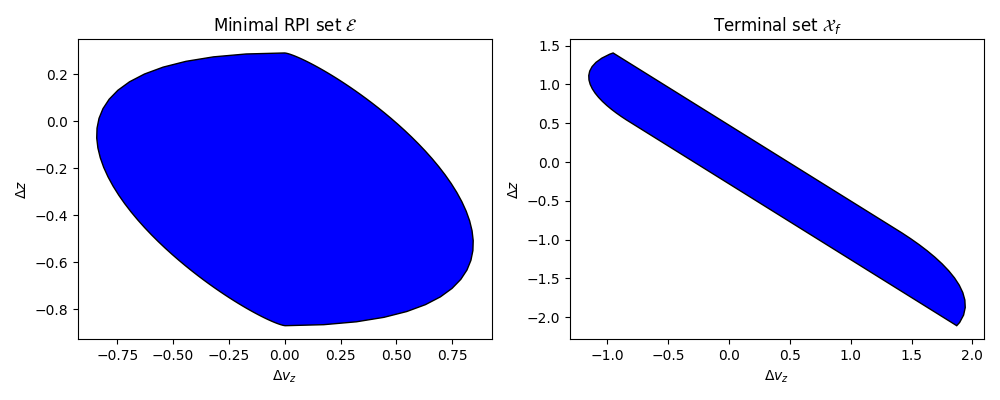

In [3]:
sim_time = 10 # simulation length in seconds
x0 = np.zeros(12)
x0[9]  = 3.0     # x
x0[10] = 2.0     # y
x0[11] = 10.0    # z
x0[2]  = np.deg2rad(30)  # roll
x_ref = np.array([0.] * 9 + [1., 0., 3.])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
A, B = rocket.linearize(xs, us)

# MPC parameters
H = 5
# Merge four linear mpc
mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_ref)

Simulating time 0.00
Set parameter Username
Academic license - for non-commercial use only - expires 2026-08-29

 State alpha violation: 0.18 > 0.17, 
 State beta violation: -0.21 < -0.17, 
 State alpha violation: 0.23 > 0.17, 
 State beta violation: -0.23 < -0.17, 
 State alpha violation: 0.26 > 0.17, 
 State beta violation: -0.23 < -0.17, 
 State alpha violation: 0.25 > 0.17, 
 State beta violation: -0.22 < -0.17, 
 State alpha violation: 0.22 > 0.17, 
 State beta violation: -0.21 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 S

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

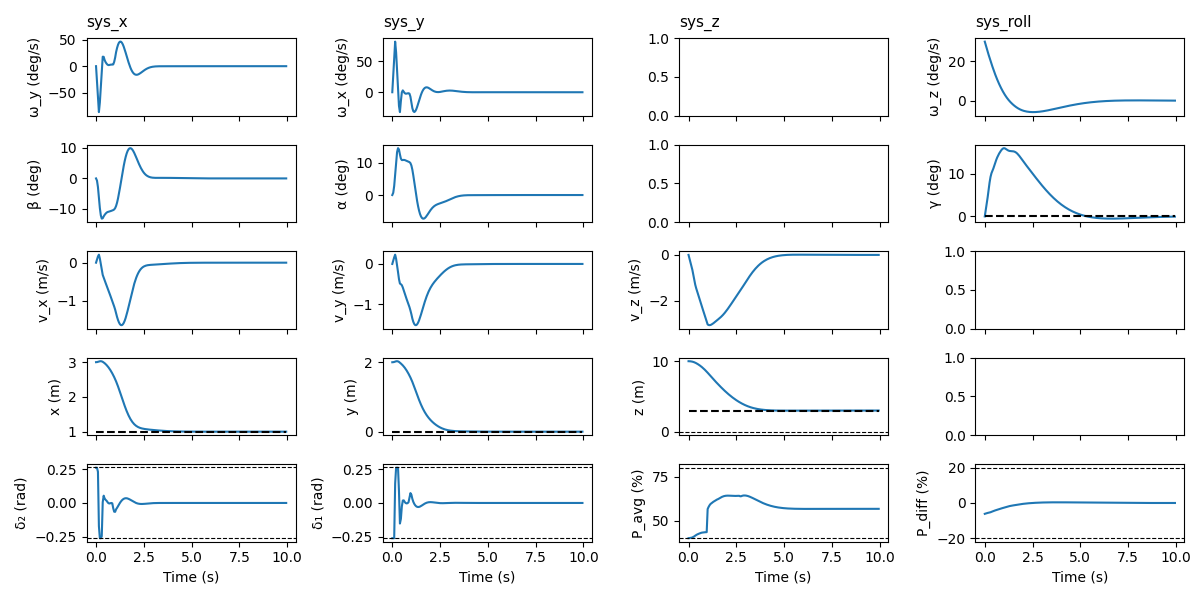

In [4]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)